In [14]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import statsmodels.api as sm

In [15]:
df = pd.read_csv('RRCA_baseflow.csv')
input_df = df.drop(['Observed'], axis=1)
output_df = df[['Observed']]
df.head(5)

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [24]:
df_LR = LR(fit_intercept = True)
display(input_df.shape, output_df.shape)
df_LR.fit(input_df, output_df)
display(df_LR.score(input_df, output_df))
input_df = sm.add_constant(input_df)
model = sm.OLS(output_df, input_df)
results = model.fit()
display(results.pvalues)

(15591, 8)

(15591, 1)

0.23561219615552786

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                  5.802495e-71
Date                  1.236333e-134
Segment_id             0.000000e+00
x                      4.912426e-04
y                      9.603538e-10
Evapotranspiration     1.011407e-05
Precipitation          0.000000e+00
Irrigation_pumping     1.009044e-02
dtype: float64

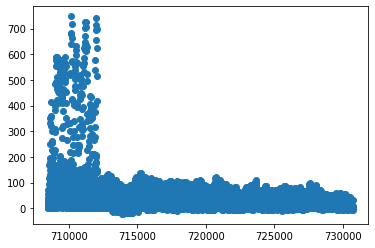

In [4]:
general_plot_df = df[['Date', 'Observed']]
general_plot_df.head(5)
plt.figure()
plt.scatter(general_plot_df.Date.values, general_plot_df.Observed.values)

# Breaking it down into river segments

In [34]:
data_frame_list = []
r_scores_for_each_segment = []
all_grid_scores = []
for segment in df.Segment_id.unique():
    current_segment = df[df.Segment_id == segment]
    segment_input = current_segment.drop(['Observed'], axis=1)
    segment_output = current_segment[['Observed']]
    segment_LR = LR()
    segment_LR.fit(segment_input, segment_output)
    columns = ['x', 'y', 'Evapotranspiration', 'Precipitation', 'Irrigation_pumping']
    r_scores_for_each_segment.append(segment_LR.score(segment_input, segment_output))

    grid_results = []
    for j in columns:
        new_input = current_segment[[j]]
        #display(new_input.shape, segment_output.shape)
        grid_LR = LR()
        grid_LR.fit(new_input, segment_output)
        grid_results.append(grid_LR.score(new_input, segment_output))
    grid1, grid2, grid3, grid4, grid5 = grid_results[0], grid_results[1], grid_results[2], grid_results[3], grid_results[4]
    all_grid_scores.append(grid_results)

    input_df = sm.add_constant(segment_input)
    model = sm.OLS(segment_output, input_df)
    results = model.fit()
    print('\nRiver Segment\n', segment, '\n', results.pvalues, 'r score\n', segment_LR.score(segment_input, segment_output))
#    print(results.summary(), 'and this is the r square value ', segment_LR.score(segment_input, segment_output))

#     test_df = current_segment[['Evapotranspiration', 'Precipitation']]
#     display(test_df.head(5))
    other_grid = []
#     for k in range(3):
#         for x in range(3):
#             if x <= k:
#                 continue
#             else:
#                 new_df = current_segment[[columns[k], columns[x]]]
#                 other_grid_LR = LR()
#                 other_grid_LR.fit(new_df, segment_output)
#                 other_grid.append(other_grid_LR.score(new_df, segment_output))
#     other_grid1, other_grid2, other_grid3 = other_grid[0], other_grid[1], other_grid[2]
    data_frame_list.append([segment, grid1, grid2, grid3, grid4, grid5, segment_LR.score(segment_input, segment_output)])
                
#display(df.Segment_id.unique(), df.Segment_id.unique().shape, r_scores_for_each_segment)
#display('all the grid scores\n', all_grid_scores)
column_df = ['segmentId', 'x', 'y', 'Evapotranspiration', 'Precipitation',
             'IrrigationPumping', 'all5Used']
full_df = pd.DataFrame(data_frame_list, columns = column_df)
#full_df.save_csv(index = False)

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 144 
 Date                  0.000159
Segment_id            0.000075
x                     0.000075
y                     0.000075
Evapotranspiration    0.016385
Precipitation         0.426635
Irrigation_pumping    0.978046
dtype: float64 r score
 0.17751164558989696

River Segment
 154 
 Date                  0.260628
Segment_id            0.259752
x                     0.259749
y                     0.259751
Evapotranspiration    0.227918
Precipitation         0.008891
Irrigation_pumping    0.667422
dtype: float64 r score
 0.2260057220798466


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 176 
 Date                  1.516875e-12
Segment_id            1.574444e-12
x                     1.574933e-12
y                     1.572343e-12
Evapotranspiration    5.294662e-09
Precipitation         1.127882e-03
Irrigation_pumping    1.985816e-02
dtype: float64 r score
 0.7228967066548906

River Segment
 171 
 Date                  1.683321e-09
Segment_id            9.614310e-03
x                     5.478139e-09
y                     8.727658e-08
Evapotranspiration    7.181255e-01
Precipitation         5.614522e-15
Irrigation_pumping    2.108352e-01
dtype: float64 r score
 0.09507460484814512


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 152 
 Date                  0.000053
Segment_id            0.126155
x                     0.177384
y                     0.021055
Evapotranspiration    0.881384
Precipitation         0.000052
Irrigation_pumping    0.004252
dtype: float64 r score
 0.40416695953105497

River Segment
 55 
 Date                  6.839767e-11
Segment_id            1.022776e-10
x                     1.024482e-10
y                     1.024399e-10
Evapotranspiration    1.638234e-05
Precipitation         2.572935e-04
Irrigation_pumping    5.895944e-01
dtype: float64 r score
 0.18725227691717217


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 118 
 Date                  0.172787
Segment_id            0.169501
x                     0.169379
y                     0.169556
Evapotranspiration    0.004065
Precipitation         0.000067
Irrigation_pumping    0.495004
dtype: float64 r score
 0.35262549849793645

River Segment
 65 
 Date                  3.004663e-74
Segment_id            1.069245e-78
x                     1.035208e-78
y                     1.043941e-78
Evapotranspiration    3.332363e-69
Precipitation         4.479035e-09
Irrigation_pumping    5.335949e-07
dtype: float64 r score
 0.6943470859945131


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 64 
 Date                  3.931995e-25
Segment_id            1.002468e-22
x                     1.002359e-22
y                     1.002716e-22
Evapotranspiration    3.416920e-07
Precipitation         6.155234e-01
Irrigation_pumping    2.094558e-04
dtype: float64 r score
 0.3791697388971479

River Segment
 63 
 Date                  0.012880
Segment_id            0.019223
x                     0.019441
y                     0.019724
Evapotranspiration    0.000001
Precipitation         0.000040
Irrigation_pumping    0.025923
dtype: float64 r score
 0.5182989868342441


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 40 
 Date                  3.333106e-07
Segment_id            5.279985e-10
x                     5.262013e-10
y                     5.268975e-10
Evapotranspiration    6.869496e-02
Precipitation         1.726703e-01
Irrigation_pumping    1.830944e-14
dtype: float64 r score
 0.4280916521017729

River Segment
 135 
 Date                  2.804141e-21
Segment_id            2.315996e-23
x                     2.274849e-23
y                     2.264842e-23
Evapotranspiration    6.507307e-04
Precipitation         6.726016e-03
Irrigation_pumping    5.145233e-09
dtype: float64 r score
 0.5348984590547401


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = c


River Segment
 53 
 Date                  5.102032e-02
Segment_id            5.345350e-18
x                     4.133208e-61
y                     3.637192e-04
Evapotranspiration    5.403726e-05
Precipitation         1.748868e-04
Irrigation_pumping    3.532663e-22
dtype: float64 r score
 0.8306475939227601

River Segment
 123 
 Date                  0.855963
Segment_id            0.856392
x                     0.856391
y                     0.856391
Evapotranspiration    0.006283
Precipitation         0.173983
Irrigation_pumping         NaN
dtype: float64 r score
 0.937805485613047


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 157 
 Date                  4.798973e-06
Segment_id            9.781423e-06
x                     9.695886e-06
y                     9.733690e-06
Evapotranspiration    7.160619e-17
Precipitation         3.988813e-06
Irrigation_pumping    1.137223e-01
dtype: float64 r score
 0.5978713813302364

River Segment
 147 
 Date                  2.341637e-145
Segment_id            1.158661e-150
x                     1.228264e-150
y                     1.211731e-150
Evapotranspiration     4.553354e-07
Precipitation          4.598887e-01
Irrigation_pumping     6.186903e-04
dtype: float64 r score
 0.7236257184631808

River Segment
 170 
 Date                  1.604254e-08
Segment_id            3.183836e-11
x                     3.023282e-11
y                     3.086257e-11
Evapotranspiration    4.322703e-11
Precipitation         3.631976e-05
Irrigation_pumping    5.243899e-26
dtype: float64 r score
 0.47641129037874974


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 136 
 Date                  5.393287e-02
Segment_id            6.156640e-02
x                     6.155657e-02
y                     6.155850e-02
Evapotranspiration    4.346128e-12
Precipitation         2.242265e-02
Irrigation_pumping    2.202479e-02
dtype: float64 r score
 0.6445479694651781

River Segment
 149 
 Date                  5.120005e-15
Segment_id            6.879980e-14
x                     6.877940e-14
y                     6.871621e-14
Evapotranspiration    4.460920e-02
Precipitation         2.976486e-12
Irrigation_pumping    5.123641e-02
dtype: float64 r score
 0.29425413493727737


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 60 
 Date                  7.494562e-04
Segment_id            6.920492e-05
x                     7.099144e-05
y                     7.406654e-05
Evapotranspiration    1.277214e-08
Precipitation         5.725960e-08
Irrigation_pumping    5.281587e-22
dtype: float64 r score
 0.5232670443447944

River Segment
 188 
 Date                  8.279540e-35
Segment_id            8.316895e-38
x                     8.062203e-38
y                     8.047497e-38
Evapotranspiration    1.617838e-02
Precipitation         2.597430e-14
Irrigation_pumping    8.760164e-18
dtype: float64 r score
 0.49563199946998604


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 194 
 Date                  0.084838
Segment_id            0.042351
x                     0.035067
y                     0.088336
Evapotranspiration    0.018495
Precipitation         0.001289
Irrigation_pumping    0.000237
dtype: float64 r score
 0.6159584101939218

River Segment
 239 
 Date                  1.803268e-02
Segment_id            1.839746e-02
x                     1.856959e-02
y                     1.837223e-02
Evapotranspiration    5.423287e-01
Precipitation         7.998884e-07
Irrigation_pumping    8.326036e-03
dtype: float64 r score
 0.2824486038853492


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, ou


River Segment
 256 
 Date                  0.013055
Segment_id            0.013401
x                     0.013401
y                     0.013401
Evapotranspiration    0.964971
Precipitation         0.000002
Irrigation_pumping         NaN
dtype: float64 r score
 0.2011410542171439

River Segment
 205 
 Date                  0.530202
Segment_id            0.528090
x                     0.532757
y                     0.537846
Evapotranspiration    0.109296
Precipitation         0.002562
Irrigation_pumping    0.011406
dtype: float64 r score
 0.22103031117872618


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 59 
 Date                  1.406474e-147
Segment_id            1.467772e-158
x                     1.459112e-158
y                     1.459486e-158
Evapotranspiration     1.229230e-21
Precipitation          8.978470e-01
Irrigation_pumping     2.923640e-01
dtype: float64 r score
 0.6734854066211118

River Segment
 148 
 Date                  6.988565e-01
Segment_id            1.036474e-01
x                     1.034839e-01
y                     1.035734e-01
Evapotranspiration    5.456573e-02
Precipitation         3.814751e-05
Irrigation_pumping    2.313612e-09
dtype: float64 r score
 0.22960063158966726


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 138 
 Date                  1.877620e-76
Segment_id            5.295299e-76
x                     5.307206e-76
y                     5.282897e-76
Evapotranspiration    4.402890e-06
Precipitation         2.474148e-02
Irrigation_pumping    8.386555e-16
dtype: float64 r score
 0.743628981735523

River Segment
 62 
 Date                  0.739803
Segment_id            0.812775
x                     0.750048
y                     0.762504
Evapotranspiration    0.010105
Precipitation         0.005023
Irrigation_pumping    0.109410
dtype: float64 r score
 0.4150038922544374


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 96 
 Date                  3.375587e-07
Segment_id            3.057152e-07
x                     2.991302e-07
y                     3.070392e-07
Evapotranspiration    6.532328e-01
Precipitation         1.926905e-15
Irrigation_pumping    2.321900e-03
dtype: float64 r score
 0.16604305574256337

River Segment
 178 
 Date                  9.515644e-10
Segment_id            1.237704e-09
x                     1.237596e-09
y                     1.237971e-09
Evapotranspiration    1.017024e-03
Precipitation         6.169763e-14
Irrigation_pumping    1.733152e-07
dtype: float64 r score
 0.2624169000571822


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, ou


River Segment
 186 
 Date                  7.878314e-04
Segment_id            1.040907e-03
x                     1.040910e-03
y                     1.040908e-03
Evapotranspiration    6.433025e-08
Precipitation         1.458218e-02
Irrigation_pumping             NaN
dtype: float64 r score
 0.3120653707820016

River Segment
 159 
 Date                  2.488966e-15
Segment_id            9.528739e-01
x                     5.524297e-03
y                     2.080100e-21
Evapotranspiration    1.694419e-19
Precipitation         3.578742e-11
Irrigation_pumping    1.736758e-10
dtype: float64 r score
 0.5226265837251144


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



River Segment
 130 
 Date                   9.739929e-90
Segment_id            3.643118e-100
x                     3.245207e-100
y                     3.654465e-100
Evapotranspiration     3.845072e-26
Precipitation          8.470438e-08
Irrigation_pumping     9.393503e-08
dtype: float64 r score
 0.6219924841616633

River Segment
 97 
 Date                  6.849274e-05
Segment_id            1.430954e-04
x                     1.438763e-04
y                     1.435082e-04
Evapotranspiration    8.705307e-18
Precipitation         2.635262e-07
Irrigation_pumping    7.218312e-10
dtype: float64 r score
 0.6914757984924859


D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_d


River Segment
 51 
 Date                  0.000050
Segment_id            0.000061
x                     0.000061
y                     0.000061
Evapotranspiration         NaN
Precipitation              NaN
Irrigation_pumping         NaN
dtype: float64 r score
 0.03282587501443679

River Segment
 145 
 Date                  0.024789
Segment_id            0.019947
x                     0.019947
y                     0.019947
Evapotranspiration         NaN
Precipitation              NaN
Irrigation_pumping         NaN
dtype: float64 r score
 0.012627226083455123


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, ou


River Segment
 196 
 Date                  0.918707
Segment_id            0.958400
x                     0.958400
y                     0.958400
Evapotranspiration         NaN
Precipitation              NaN
Irrigation_pumping         NaN
dtype: float64 r score
 1.593988726311668e-05

River Segment
 146 
 Date                  2.368305e-17
Segment_id            5.307958e-17
x                     5.307958e-17
y                     5.307958e-17
Evapotranspiration             NaN
Precipitation                  NaN
Irrigation_pumping             NaN
dtype: float64 r score
 0.1455569145364637


D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_d


River Segment
 189 
 Date                  9.590963e-23
Segment_id            2.018325e-23
x                     2.018325e-23
y                     2.018325e-23
Evapotranspiration             NaN
Precipitation                  NaN
Irrigation_pumping             NaN
dtype: float64 r score
 0.12599598041968418

River Segment
 56 
 Date                  2.934523e-132
Segment_id            1.317940e-129
x                     1.317940e-129
y                     1.317940e-129
Evapotranspiration              NaN
Precipitation                   NaN
Irrigation_pumping              NaN
dtype: float64 r score
 0.6017162432180048

River Segment
 98 
 Date                  1.196024e-34
Segment_id            3.826386e-35
x                     3.826386e-35
y                     3.826386e-35
Evapotranspiration             NaN
Precipitation                  NaN
Irrigation_pumping             NaN
dtype: float64 r score
 0.38265592589119024


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [33]:
full_df.head(15)


,segmentId,x,y,Evapotranspiration,Precipitation,IrrigationPumping,all5Used
0,144,0.000000,0.000000,0.039283,0.000704,0.046109,0.177512
1,154,0.000000,0.000000,0.086525,0.124377,0.065269,0.226006
2,176,0.000000,0.000000,0.140600,0.473611,0.084546,0.722897
3,171,0.002638,0.002638,0.002342,0.025051,0.005618,0.095075
4,152,0.328593,0.328593,0.128574,0.358144,0.019181,0.404167
5,55,0.000000,0.000000,0.046794,0.029555,0.069773,0.187252
6,118,0.000000,0.000000,0.163320,0.150463,0.108105,0.352625
7,65,0.000000,0.000000,0.389152,0.030690,0.394882,0.694347
8,64,0.000000,0.000000,0.152194,0.046034,0.032651,0.379170
9,63,0.000000,0.000000,0.393018,0.121982,0.262347,0.518299


In [8]:
# r_scores = []
# for segment in df.Segment_id.unique():
#     current_segment = df[df.Segment_id == segment]
#     segment_input = current_segment.drop(['Observed', 'Segment_id'], axis=1)
#     display(segment_input.head(5))
#     segment_output = current_segment[['Observed']]
#     segment_LR = LR()
#     segment_LR.fit(segment_input, segment_output)
#     r_scores.append(segment_LR.score(segment_input, segment_output))
# display(df.Segment_id.unique(), df.Segment_id.unique().shape, r_scores)
(p,r,f,s) = precision_recall_fscore_support(y_ctrue, y_cpredict)
